<a href="https://colab.research.google.com/github/DevTedd/Capstone-Project-Moringa---NLP/blob/main/Edited_Pro_Dev_Project_Current_19_2._edits%20with%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proffesional Development : Capstone Project

Team Members 



1.   Kevin Kilonzo

2.   Rachel Juman

3.   Farnadis Kanja

4.   Ted Kiamni



# Problem Statement 

With the help of this dataset, one can understand more about human sentiments and also analyse the situation when a particular person intends to make use of hatred/racist comments

# Main Objective 

**The creation of a model that can identify hateful tweets**

# Business Understanding

Social media, twitter in particular, has now become an integral part of how news is delivered. The demand for information continues to grow as has the sources of this news and thus creating a need for news classification. Using machine learning, news can be classified, therefore, enabling the user to access information that is interesting to them quickly and efficiently. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import re
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/content/train_tweet.csv")
test = pd.read_csv("/content/test_tweets.csv")

In [3]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [5]:
train.shape

(31962, 3)

In [6]:
test.shape

(17197, 2)

In [7]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [8]:
#Lets see how the hateful and non-hateful comments are distributed
train['label'].unique()

array([0, 1])

# Data Cleaning

In [9]:
df = train
df.head(2)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...


In [10]:
#Removing links 
df["clean_tweets"] = df["tweet"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[['tweet','clean_tweets']].iloc[9]


tweet            @user @user welcome here !  i'm   it's so #gr...
clean_tweets        @user @user welcome here ! i'm it's so #gr8 !
Name: 9, dtype: object

In [11]:
#Changing all the letter to lower case
df['clean_tweets'] = df.tweet.map(lambda x: x.lower())
train.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#Removing the punctuation
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['clean_tweets'] = df['clean_tweets'].str.replace('user','')
df['clean_tweets']



0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i cant use cause they...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate  isz that youuuððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary wso cond...
31961                          thank you  for you follow  
Name: clean_tweets, Length: 31962, dtype: object

In [13]:
df.tail(12)

,id,label,tweet,clean_tweets
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt...",you can try to tail us to stop butt were jus...
31951,31952,0,i've just posted a new blog: #secondlife #lone...,ive just posted a new blog secondlife lonely n...
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull up you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than 2 weeks ð ðð¼ð¹ððµ ib...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...


# Removing emojis

In [14]:
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for examsð¯...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [15]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_tweets"] = df["clean_tweets"].apply(lambda s: deEmojify(s))
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


# Tokenization 

In [16]:
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


# Begin Tokenization

In [17]:
#Removing the word user 
import spacy 
#This library is quite popular now and NLP practitioners use this to get their work done in the best way.
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'others', 'against', 'mostly', 'no', 'doing', 'we', 'thereafter', 'myself', 'hundred', 'why', 'anyhow', 'never', 'toward', 'him', 'what', 'whoever', 'if', 'really', 'last', 'eight', 'and', 'twenty', 'except', 'formerly', 'or', 'meanwhile', 'less', 'seemed', 'another', 'than', 'may', 'through', 'one', 'by', 'along', 'there', 'behind', 'ever', 'those', 'empty', 'therein', 'over', 'also', 'using', 'most', "'re", 'has', 'these', 'nor', 'of', 'full', 'they', 'quite', 'would', '’d', 'i', 'under', 'top', 'almost', 'their', 'to', 'becomes', 'towards', 'a', 'already', 'via', 'whereafter', 'from', 'everyone', 'anyway', 'nobody', 'whatever', 'give', 're', 'some', 'as', 'otherwise', 'made', 'until', 'wherein', 'whence', '’ll', 'anywhere', 'six', 'this', 'becoming', 'which', 'who', 'my', '‘d', 'when', 'together', 'make', 'here', 'nowhere', 'how', 'not', 'wherever', 'nine', 'nothing', 'such', 'front', 'various', 'indeed', '‘m', 'seems', 'bottom', 'every', '‘ll', 'on', 'whither', 'alone', 'forty', '

In [18]:
# We will also download and import nlkt which is a tokenizer. 
# This library will help us break (messages) into individual linguistic units i.e. words.
#
# Applying the tokenization
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

True

In [19]:
# to remove stop words
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))


In [20]:
#tweets_space = [tweet for word in df.split() if word.lower() not in sw_spacy]
df.head(10)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams cant think school ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8


In [21]:
df.head(50)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams cant think school ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8


# Exploratory Data Analysis

In [22]:
# EDA dataframe
df_eda = df.copy()
df_eda.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


## Univariate

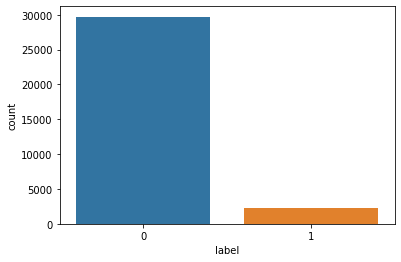

In [23]:
# Count plot of label column(0-Non hateful, 1-hateful)
sb.countplot(df_eda['label'])

In [24]:
# Most commom words
from collections import Counter


Can we really say that space will be the highest letter

In [25]:
df_eda["clean_tweets"] =df_eda["clean_tweets"].apply(lambda x:str(x).split())
top = Counter([item for sublist in df["clean_tweets"] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,,221157
1,e,171227
2,a,126918
3,i,108061
4,o,105963
5,t,100960
6,s,98843
7,n,97573
8,r,85639
9,l,82664


In [26]:
#Without the first row that was the 'space' character
temp = temp[temp.Common_words != ' ']
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

#We can see that E is the most common letter, which alligns with how often its used in english, which out texts were in

,Common_words,count
1,e,171227
2,a,126918
3,i,108061
4,o,105963
5,t,100960
6,s,98843
7,n,97573
8,r,85639
9,l,82664
10,d,61334


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [28]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [29]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

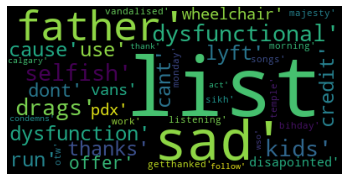

In [31]:
from wordcloud import WordCloud

text = df_eda['clean_tweets'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Bivariate

In [40]:
#Selecting the negative tweets
negative_tweets = df_eda[df_eda['label']== 1]
negative_tweets.head()

,id,label,tweet,clean_tweets
13,14,1,@user #cnn calls #michigan middle school 'buil...,"[cnn, calls, michigan, middle, school, build, ..."
14,15,1,no comment! in #australia #opkillingbay #se...,"[comment, australia, opkillingbay, seashepherd..."
17,18,1,retweet if you agree!,"[retweet, agree]"
23,24,1,@user @user lumpy says i am a . prove it lumpy.,"[lumpy, says, prove, lumpy]"
34,35,1,it's unbelievable that in the 21st century we'...,"[unbelievable, 21st, century, wed, need, somet..."


In [41]:
top = Counter([item for sublist in negative_tweets["clean_tweets"] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,amp,283
1,trump,199
2,libtard,149
3,like,139
4,white,138
5,black,131
6,racist,103
7,politics,97
8,people,95
9,allahsoil,92


In [44]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [45]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [46]:
#Selecting the negative tweets
positive_tweets = df_eda[df_eda['label']== 0]
positive_tweets.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [47]:
top = Counter([item for sublist in positive_tweets["clean_tweets"] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,love,2699
1,day,2248
2,happy,1679
3,amp,1319
4,life,1121
5,u,1116
6,im,1112
7,time,1103
8,today,993
9,positive,931


In [48]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [49]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

**Comments**



# Lets move on to 
